In [161]:
import tweepy
import json
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from config import consumer_key, consumer_secret, access_token, access_token_secret


In [162]:
# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [163]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [165]:

#BBC, CBS, CNN, Fox, and New York times.
# Target User Account"
target_users = ["@bbc", "@cbs", "@cnn", "@fox", "@nytimes"]

sentiments=[]
counter =0
#Loop through the news site list
for target_user in target_users:
    
    
    #for each news site, Loop through 5 pages of tweets (total 100 tweets)
    for x in range(5):

        #Get all tweets from home feed
        public_tweets = api.user_timeline(target_user, page=x+1)


        # Loop through all tweets
        for tweet in public_tweets:

            # Run Vader Analysis on each tweet, target the text in each tweet. 
            results = analyzer.polarity_scores(tweet["text"])
            compound = results["compound"]
            pos = results["pos"]
            neu = results["neu"]
            neg = results["neg"]
            date=tweet["created_at"]

        # Add each value to the appropriate list
        #compound_list.append(compound)
        #positive_list.append(pos)
        #negative_list.append(neg)
        #neutral_list.append(neu)
        #date_list.append(date)
        #tweets_ago.append(counter)
        #put all into dictionary
            sentiments.append({"Date": tweet["created_at"],
                               "User":target_user,
                           "Compound": compound,
                           "Positive": pos,
                           "Negative": neu,
                           "Neutral": neg,
                           "Tweets Ago": counter,
                            "Text":tweet['text']})
        
            counter=counter+1
        
            print(tweet["text"], tweet['user']['screen_name'])
            print()
            
    #reset the counter when it shifts to new target user
    counter=0


This #WorldFrogDay, why not try making an origami jumping frog with @BBCTaster's step-by-step tutorial? 🐸… https://t.co/jjMqUND883 BBC

Michael Portillo travels across India guided by Bradshaw's 1913 Handbook of Indian, Foreign and Colonial Travel. 🇮🇳… https://t.co/4WG0esDk8m BBC

Can you watch this without laughing? 😹🔊 You'll want your sound on for this! #InternationalDayOfHappiness

https://t.co/vA5yr0PCC5 BBC

Professor Stephen Hawking's funeral will take place in Cambridge - "the city that he loved so much and which loved… https://t.co/LHh0Nfeh6U BBC

Un-bee-lievable! 🐝😍 Meet the woman who kept a bee as a pet. 
https://t.co/5zRxWpSGOH BBC

Arise, Sir Ringo! 🎖🎶@thebeatles drummer @ringostarrmusic has been knighted for his services to music.… https://t.co/OQLixgO2Zi BBC

The first polar bear cub to be born in the UK for 25 years has emerged from his den at Scotland's Highland Wildlife… https://t.co/WZLoy2mz7y BBC

'Everybody has a voice'. ❤️️🎶

Rugby legends JPR Williams and JJ Willi

Yes, Gary Oldman and @BBCEastEnders' Big Mo are brother and sister. 

But do you know these other celeb family ties… https://t.co/dtzMwD3nBB BBC

RT @BBCOne: .@NiallOfficial won't let fame get to his head - Ireland won't allow it. 

Happy #StPatricksDay 🍀 https://t.co/OrWR94HStF BBC

♻️🗑 This shop encourages you to bring your own container from home to save on single-use plastic waste. https://t.co/TdHJSycKtO BBC

🇮🇪 🍀 Celebrate #StPatricksDay in true Irish style with these delicious recipes! 👉https://t.co/2MCMlz6K0B https://t.co/k18P3Syx2N BBC

From scrambled eggs to chilli-spiced crisps: here are six great ways to cook with kale. 😋👉https://t.co/lqKD1h83Iv https://t.co/yWESBJm62q BBC

RT @BBCTwo: Happy #StPatricksDay! Check out what's lurking beneath the calm waters of Ireland's west coast... 🇮🇪🦈 https://t.co/6MQgyLTlIr BBC

🎶🐦 Did you know that bullfinches can learn to sing a tune by mimicking humans?

🔊 Sound on for this one!  https://t.co/44OFulioZp BBC

RT @BBCEngland: Stephen Haw

RT @MarenMorris: Hot damn! Woke up from my post-wisdom teeth haze to find out I’m up for 4 @ACMawards ! So honored, especially for the Dear… CBS

RT @KelseaBallerini: Ohhhhh goodness. Incredible. Thank you thank you thank you. #female https://t.co/1ZTYjNfQeF CBS

RT @KeithUrban: ACMs...... HOLY SMOKES!!!!! MAD LOVE TO U ALL THIS MORNING  FOR THESE INCREDIBLE NOMINATIONS. I’M EXTREMELY GRATEFUL!!!!!!!… CBS

RT @ACMawards: Congratulations to this year’s #ACMawards Video of the Year nominees:
“Black” - @DierksBentley
“It Ain’t My Fault” - @Brothe… CBS

RT @ACMawards: Please give a round of applause to this year’s #ACMawards Entertainer of the Year nominees: @Jason_Aldean, @GarthBrooks, @Lu… CBS

.@ChrisStapleton, @ThomasRhett, @mirandalambert and more are all nominated for awards at Country Music's Party of t… https://t.co/Vm1vXRUDYJ CBS

The Queen of Country, @Reba, is returning to host the 53rd #ACMawards on Sunday, April 15 at 8/7c. Here are a few o… https://t.co/Iqzz6Gql01 CBS

RT @su

Amy Poehler's directorial debut will have wine and lots of "SNL" alums https://t.co/sPCHkb1n1U https://t.co/e4ef3AayV2 CNN

The Department of Health and Human Services has not updated the databases that show the public how much money the g… https://t.co/CRsOm87zuM CNN

You can buy a reproduction of the Wall Street "Fearless Girl" statue for $6,500 https://t.co/bXrdagLI8z https://t.co/IBP6E0KOxL CNN

A liberal group staffer was arrested last week and charged with assaulting an aide to Interior Secretary Ryan Zinke… https://t.co/kgdx2COPuy CNN

3 Trump-related lawsuits: Porn star, Playboy model, harassment accuser | Analysis by CNN's Z. Byron Wolf… https://t.co/tyE5kM0AKr CNN

A family friend who took in the Parkland shooter says she forbid him to bring his guns into her home and warned pol… https://t.co/fpfOQgL9am CNN

Here's exactly how much trouble Cynthia Nixon can cause for Andrew Cuomo | Analysis by @CillizzaCNN… https://t.co/mx4OV9VniK CNN

An overheated engine oil warning caused 

Within minutes of news of yet another school shooting, survivors of last month's massacre at a high school in Parkl… https://t.co/5iSFYxSJ7A CNN

United Airlines says it is suspending a program that transports pets in cargo holds https://t.co/Fbamn4NEIp https://t.co/R19QomWoRf CNN

Michelle Obama is so popular she needed more space. The painting of the former first lady, unveiled at the Smithson… https://t.co/MVW21uSZx2 CNN

The National Rifle Association is criticizing Florida's Republican House Speaker Richard Corcoran for his comments… https://t.co/1tYOw2EkR3 CNN

President Trump says he congratulated Vladimir Putin on winning the Russian presidential election. Trump also spoke… https://t.co/U6o1ceKRp3 CNN

Facebook's stock is sliding for the second day in a row. Shares fell another 5% Tuesday on the heels of the company… https://t.co/JfWDwvn2fe CNN

Ohio might soon have an official state dog. 12 other states already do: https://t.co/qGUIsaFzjt https://t.co/i572sStWij CNN

President

My last two weeks were spent in email. Conference organiser life. https://t.co/h5hlszzyjv fox

This video with Jeff Goldblum is everything. https://t.co/vo5HSwuOUP fox

Accepting talk proposals for conferences on a rolling basis: no no no no.

First come first serve doesn’t work for inclusion. fox

If you are in Melbourne on Monday, March 19, we’re opening @cssconfau, @jsconfau and @decompressau with a Community… https://t.co/OyPVisZXYn fox

Australia is racist as hell. https://t.co/EIRFzejhsi fox

RT @sarahmei: 📢 PSA: when you're building a diverse team, you're looking for culture _add_, not culture _fit_. Hire people who bring a pers… fox

RT @piamancini: ok I need help. I really really want to hire a kickass developer who also happens to be a woman (backend pref.) What are th… fox

@piamancini Hey Pia! Thanks for reaching out 👋🏻 Unfortunately, software engineering isn’t my background; I’m a FE d… https://t.co/1IEwNKyc9q fox

RT @EricaJoy: 📢 PSA: There are no "diverse" applicants
Peo

Authorities are scrambling for clues that could connect a package that exploded in San Antonio to the explosions in… https://t.co/vDdsdRmsxK nytimes

This is a story about dogs at the movies https://t.co/8afzOXv0C1 https://t.co/U6jURj2LPl nytimes

A California law that requires “crisis pregnancy centers” to provide information about abortion met a skeptical rec… https://t.co/rebHavwlUR nytimes

RT @nytimesworld: As the number of mountaineers winding through the Everest region has multiplied, so has the trash — beer bottles, food ca… nytimes

RT @nytopinion: Running across a person who had committed genocide was always a possibility in Argentina in the 1990s https://t.co/5RTwC8va… nytimes

If you liked Kim Kardashian on Facebook, researchers can tell how extroverted (very), conscientious (more than most… https://t.co/Cj11Mh00Kf nytimes

Cynthia Nixon, on her first full day as a candidate, wasted no time in confronting Gov. Cuomo in sharp and personal… https://t.co/dAknK25Uvi nytimes

A 

A Facebook executive who urged transparency on Russian disinformation is said to be leaving after clashing with oth… https://t.co/YIe5Pp6zb7 nytimes

5 important takeaways from China's National People's Congress https://t.co/ktm54IYt4R nytimes

Videos appear to show individuals casting multiple ballots during Russia's election  https://t.co/CHuJr7GdJ5 nytimes

Britain's government has raised the possibility that it might consider seizing the assets of wealthy Russians like… https://t.co/eoMrHLRvCZ nytimes

A U.S. soldier in Niger warned that his unit was ill equipped for a raid on a militant. They were sent anyway, and… https://t.co/c4JMwYfTZf nytimes

RT @nytimesworld: The kidnapping of 110 girls by Boko Haram has left anguished parents asking how such a kidnapping could happen again http… nytimes

“Send some girls around to the candidate’s house.”

As part of a monthslong investigation into Cambridge Analytica,… https://t.co/yArOs3bQmM nytimes

RT @ScottShaneNYT: Covering Facebook is

In [166]:
#put all into dataframe
sentiments_pd = pd.DataFrame.from_dict(sentiments)
sentiments_pd.head(70)


,Compound,Date,Negative,Neutral,Positive,Text,Tweets Ago,User
0,0.0000,Tue Mar 20 19:48:04 +0000 2018,1.000,0.000,0.000,"This #WorldFrogDay, why not try making an orig...",0,@bbc
1,0.0000,Tue Mar 20 19:03:04 +0000 2018,1.000,0.000,0.000,Michael Portillo travels across India guided b...,1,@bbc
2,-0.3859,Tue Mar 20 18:33:01 +0000 2018,0.768,0.160,0.071,Can you watch this without laughing? 😹🔊 You'll...,2,@bbc
3,0.3400,Tue Mar 20 17:33:03 +0000 2018,0.738,0.102,0.160,Professor Stephen Hawking's funeral will take ...,3,@bbc
4,0.0000,Tue Mar 20 17:03:01 +0000 2018,1.000,0.000,0.000,Un-bee-lievable! 🐝😍 Meet the woman who kept a ...,4,@bbc
5,0.0000,Tue Mar 20 16:05:04 +0000 2018,1.000,0.000,0.000,"Arise, Sir Ringo! 🎖🎶@thebeatles drummer @ringo...",5,@bbc
6,0.0000,Tue Mar 20 15:33:03 +0000 2018,1.000,0.000,0.000,The first polar bear cub to be born in the UK ...,6,@bbc
7,0.4084,Tue Mar 20 15:03:02 +0000 2018,0.868,0.000,0.132,'Everybody has a voice'. ❤️️🎶\n\nRugby legends...,7,@bbc
8,0.6369,Tue Mar 20 14:24:06 +0000 2018,0.741,0.000,0.259,📸The best pictures from the 2018 Paralympic Wi...,8,@bbc
9,0.0000,Tue Mar 20 14:03:04 +0000 2018,1.000,0.000,0.000,Prince Harry and Meghan Markle have chosen an ...,9,@bbc


In [167]:
#check how many tweets came thru for each
sentiments_pd.groupby('User').count()

,Compound,Date,Negative,Neutral,Positive,Text,Tweets Ago
User,,,,,,,
@bbc,100,100,100,100,100,100,100
@cbs,100,100,100,100,100,100,100
@cnn,100,100,100,100,100,100,100
@fox,100,100,100,100,100,100,100
@nytimes,100,100,100,100,100,100,100


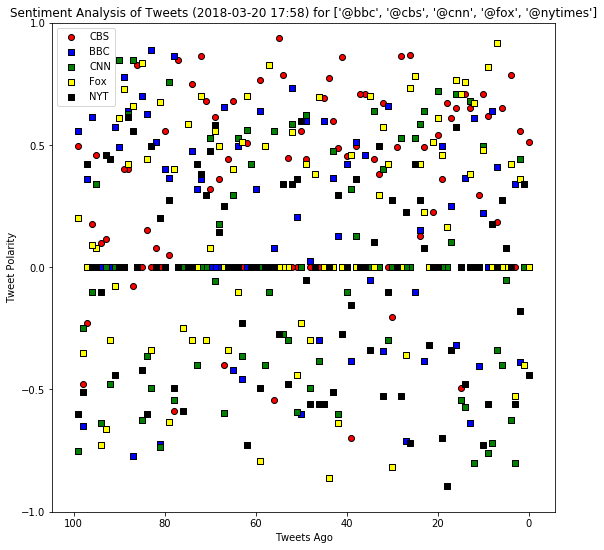

In [177]:
now = datetime.now()
now = now.strftime("%Y-%m-%d %H:%M")
plt.figure(figsize=(9,9))
plt.scatter(sentiments_pd.loc[sentiments_pd['User'] == '@cbs', 'Tweets Ago'],sentiments_pd.loc[sentiments_pd['User'] == '@cbs', 'Compound'], marker="o", facecolors="red", edgecolors="black", label="CBS"),
plt.scatter(sentiments_pd.loc[sentiments_pd['User'] == '@bbc', 'Tweets Ago'], sentiments_pd.loc[sentiments_pd['User'] == '@bbc', 'Compound'], marker="s", facecolors="blue", edgecolors="black", label="BBC");
plt.scatter(sentiments_pd.loc[sentiments_pd['User'] == '@cnn', 'Tweets Ago'], sentiments_pd.loc[sentiments_pd['User'] == '@cnn', 'Compound'], marker="s", facecolors="green", edgecolors="black", label="CNN");
plt.scatter(sentiments_pd.loc[sentiments_pd['User'] == '@fox', 'Tweets Ago'], sentiments_pd.loc[sentiments_pd['User'] == '@fox', 'Compound'], marker="s", facecolors="yellow", edgecolors="black", label="Fox");
plt.scatter(sentiments_pd.loc[sentiments_pd['User'] == '@nytimes', 'Tweets Ago'], sentiments_pd.loc[sentiments_pd['User'] == '@nytimes', 'Compound'], marker="s", facecolors="black", edgecolors="black", label="NYT");
plt.title("Sentiment Analysis of Tweets ({}) for {}".format(now, target_users))
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")
plt.gca().invert_xaxis()
plt.ylim(-1,1)
tick_locations = [-1,-.5,0,.5,1]
plt.yticks(tick_locations)

plt.legend(loc=0)
plt.savefig("SentimentScatter.png")
plt.show()

In [171]:
#average compound score for each news outlet
avg_sentiment = sentiments_pd.groupby("User")
avg_sentiment['Compound'].mean().round(2)

User
@bbc        0.13
@cbs        0.30
@cnn       -0.00
@fox        0.15
@nytimes   -0.04
Name: Compound, dtype: float64

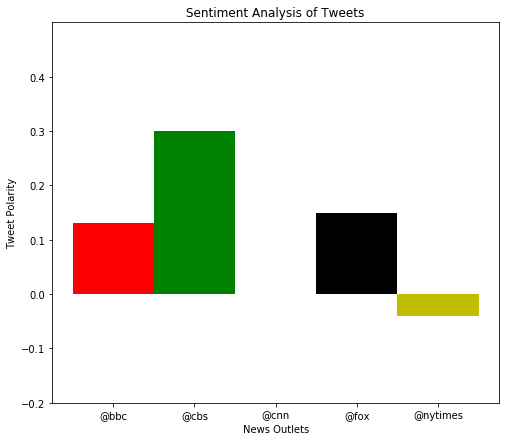

In [176]:
# Create a bar chart based upon the above data
my_colors = 'rgbkymc'
plt.figure(figsize=(8,7))

plt.bar(target_users, avg_sentiment['Compound'].mean().round(2),color=my_colors,width=1, align="center")

tick_locations = [-.2,-.1,0,.1,.2,.3,.4]
plt.yticks(tick_locations)


# Set the limits of the y axis
plt.ylim(-.2,.5)

# Give the chart a title, x label, and y label
plt.title("Sentiment Analysis of Tweets")
plt.xlabel("News Outlets")
plt.ylabel("Tweet Polarity")
plt.savefig("SentimentBar.png")
plt.show()

In [173]:
sentiments_pd.to_csv("SentimentData.csv", index=False)

In [ ]:
#observations:
#Doesn't seem to be any observable trends from the scatter plots.
#the Bar chart obviously show the New York times with the lowest avg compound sentiment, and 
#cbs with the highest. Fox news, surprisingly, is more positive than the NYT in their tweets!